In [10]:
import scipy, pandas as pd,numpy as np, matplotlib.pyplot as plt
import collections
from statistics import mean, median,variance,stdev


import glob
import os
import networkx as nx

In [13]:
Ov = pd.read_csv('Ov.csv').drop(columns = ['Unnamed: 0.1', 'Unnamed: 0']) #over 26 cites by igo

In [ ]:
# SKIP
path = '/disks/qnap2/notebook/t-iwata/monooki/citationNetwork'
allCsvs = sorted(glob.glob(path + "/*.csv"))
dfList = []
policyCitationMin = []
for f in allCsvs:
    df = pd.read_csv(f)
    policyCitationMin.append(min(df['Policy citation count'].dropna()))
    dfList.append(df)

In [ ]:
# SKIP
print(policyCitationMin)

In [5]:
df0 = pd.concat(dfList, ignore_index=True)
df2 = df0[df0['Cited by type'] == 'igo']
len(df2)

111064

In [6]:
df0.to_csv('df0.csv')

In [7]:
df0Test = pd.read_csv('df0.csv')

In [8]:
df0 = df0Test.drop(columns = 'Unnamed: 0')

In [9]:
df2 = df0[df0['Cited by type'] == 'igo']

In [10]:
uniqueTitlesAll = list(dict.fromkeys(df2['DOI']))
len(uniqueTitlesAll)

5081

In [11]:
df = df2[df2['Policy citation count'] >= 26]
len(df)

111064

In [12]:
df = pd.read_csv('df.csv').drop(columns = 'Unnamed: 0')

In [13]:
uniqueTitles26 = list(dict.fromkeys(df['DOI']))
len(uniqueTitles26)

5081

In [14]:
Ov

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),Type,Publisher,Authors
0,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,unitednations,United Nations,World Trade Report : 2022 climate change and i...,2022-01-01,igo,NaN,IGO,https://digitallibrary.un.org/record/3997236?l...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
1,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,nordiccouncil,Nordic Council,Nordic Economic Policy Review,2016-02-09,igo,NaN,IGO,https://www.norden.org/en/publication/nordic-e...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
2,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,unctad,UNCTAD,Trade and Development Report 2017,2017-08-07,igo,NaN,IGO,https://unctad.org/system/files/official-docum...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
3,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,worldbank,World Bank,From Swimming in Sand to High and Sustainable ...,2022-10-11,igo,development bank,IGO,https://openknowledge.worldbank.org/handle/109...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
4,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Improving skills and employment opportunities ...,2022-10-10,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/51e...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111059,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,OECD Employment Outlook 2022,2022-09-09,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/1bb...,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
111060,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,SME Policy Index: Western Balkans and Turkey 2022,2022-07-08,igo,NaN,IGO,https://dx.doi.org/10.1787/b47d15f0-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
111061,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Making the most of public investment to addres...,2022-06-22,igo,NaN,IGO,https://dx.doi.org/10.1787/8a1fb523-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
111062,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Optimiser l'investissement public pour faire f...,2022-06-24,igo,NaN,IGO,https://dx.doi.org/10.1787/1ba1278d-fr,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN


In [15]:
df.to_csv('df.csv')

In [16]:
min(Ov['Policy citation count'])

26

In [17]:
sourceIgos = Ov.groupby('Cited by source ID') #76 igos

In [9]:
max(sourceIgos.size())

44941

In [10]:
min(sourceIgos.size())

1

In [18]:
IgosSorted = sourceIgos.size().sort_values(ascending=False)
IgosSorted

Cited by source ID
oecddiscovery         44941
worldbank             17700
who                    9840
iadb                   5930
imf                    4866
                      ...  
ohchr                     4
echr_court                4
opcwint                   3
mekongriver               2
sanitationandwater        1
Length: 76, dtype: int64

(array([71.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 4.4950e+03, 8.9890e+03, 1.3483e+04, 1.7977e+04,
        2.2471e+04, 2.6965e+04, 3.1459e+04, 3.5953e+04, 4.0447e+04,
        4.4941e+04]),
 <BarContainer object of 10 artists>)

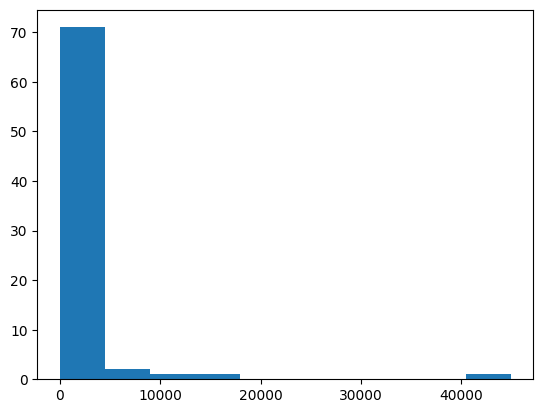

In [19]:
plt.hist(IgosSorted)

In [13]:
np.array(IgosSorted)

array([44941, 17700,  9840,  5930,  4866,  3482,  2499,  2383,  2054,
        1674,  1522,  1372,  1309,   821,   801,   753,   722,   696,
         588,   503,   501,   482,   415,   381,   337,   302,   302,
         299,   274,   271,   204,   200,   198,   182,   179,   158,
         155,   145,   135,   133,   129,   118,    99,    88,    87,
          73,    72,    68,    62,    60,    56,    41,    41,    36,
          35,    32,    28,    27,    25,    22,    22,    17,    16,
          16,    15,    11,    11,    10,    10,     8,     6,     4,
           4,     3,     2,     1])

In [22]:
cites0 = sourceIgos['DOI'].apply(list)
cites0

Cited by source ID
afdb             [10.1086/682347, 10.1086/684014, 10.1093/restu...
africacdc        [10.1001/jama.2016.4151, 10.1002/14651858.cd00...
africanunion     [10.1016/j.jdeveco.2015.10.007, 10.1787/978926...
arcticcouncil    [10.1007/978-3-658-13213-2_95, 10.1007/978-3-6...
asean            [10.1016/s0140-6736(15)01024-7, 10.1787/g2g555...
                                       ...                        
wmo              [10.17226/21852, 10.1038/nclimate2769, 10.1038...
worldbank        [10.1093/restud/rdv039, 10.1093/restud/rdv039,...
worldbankifc     [10.1596/978-1-4648-0671-1, 10.1596/978-1-4648...
worldfood        [10.1016/s0140-6736(15)01024-7, 10.1016/s0140-...
wto              [10.1086/682384, 10.1093/wber/lhv039, 10.1086/...
Name: DOI, Length: 76, dtype: object

In [23]:
cites1 = cites0.reset_index()
cites1

,Cited by source ID,DOI
0,afdb,"[10.1086/682347, 10.1086/684014, 10.1093/restu..."
1,africacdc,"[10.1001/jama.2016.4151, 10.1002/14651858.cd00..."
2,africanunion,"[10.1016/j.jdeveco.2015.10.007, 10.1787/978926..."
3,arcticcouncil,"[10.1007/978-3-658-13213-2_95, 10.1007/978-3-6..."
4,asean,"[10.1016/s0140-6736(15)01024-7, 10.1787/g2g555..."
...,...,...
71,wmo,"[10.17226/21852, 10.1038/nclimate2769, 10.1038..."
72,worldbank,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,..."
73,worldbankifc,"[10.1596/978-1-4648-0671-1, 10.1596/978-1-4648..."
74,worldfood,"[10.1016/s0140-6736(15)01024-7, 10.1016/s0140-..."


In [24]:
numCites = []
for i in range(len(cites1)):
    sth = len(cites1.iloc[i]['DOI'])
    numCites.append(sth)
df1 = pd.DataFrame(numCites, columns = ['numCites'])
df1

,numCites
0,302
1,145
2,118
3,60
4,271
...,...
71,722
72,17700
73,133
74,337


In [25]:
citesABC = pd.concat([cites1, df1], axis = 1)
citesABC

,Cited by source ID,DOI,numCites
0,afdb,"[10.1086/682347, 10.1086/684014, 10.1093/restu...",302
1,africacdc,"[10.1001/jama.2016.4151, 10.1002/14651858.cd00...",145
2,africanunion,"[10.1016/j.jdeveco.2015.10.007, 10.1787/978926...",118
3,arcticcouncil,"[10.1007/978-3-658-13213-2_95, 10.1007/978-3-6...",60
4,asean,"[10.1016/s0140-6736(15)01024-7, 10.1787/g2g555...",271
...,...,...,...
71,wmo,"[10.17226/21852, 10.1038/nclimate2769, 10.1038...",722
72,worldbank,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",17700
73,worldbankifc,"[10.1596/978-1-4648-0671-1, 10.1596/978-1-4648...",133
74,worldfood,"[10.1016/s0140-6736(15)01024-7, 10.1016/s0140-...",337


In [26]:
cites = citesABC.sort_values(by = 'numCites', ascending = False).reset_index(drop = True)
cites

,Cited by source ID,DOI,numCites
0,oecddiscovery,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",44941
1,worldbank,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",17700
2,who,"[10.1016/s0140-6736(15)01024-7, 10.1016/s0140-...",9840
3,iadb,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",5930
4,imf,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",4866
...,...,...,...
71,ohchr,"[10.1787/9789264267213-en, 10.1596/978-1-4648-...",4
72,echr_court,"[10.1093/law/9780198743620.003.0019, 10.1093/l...",4
73,opcwint,"[10.1038/533452a, 10.2139/ssrn.2868303, 10.103...",3
74,mekongriver,"[10.1038/nclimate2765, 10.1038/nature20584]",2


## Igo Network

In [20]:
def jacc(list1, list2):
    #delete duplicates
    list1 = list(dict.fromkeys(list1))
    list2 = list(dict.fromkeys(list2))
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [27]:
JaccS = []
JaccD = []
for i in range(len(cites)):
    tmpJS = ['-']*i
    tmpJD = ['-']*i
    for s in cites.iloc[i]['DOI']:
        str(s)
    for j in range(i, len(cites), 1):
        for s in cites.iloc[j]['DOI']:
            str(s)
        a = cites.iloc[i]['DOI']
        b = cites.iloc[j]['DOI']
        jim = jacc(a, b)
        #js = jaccard_score(a, b, average = 'none')
        tmpJS.append(jim)
        tmpJD.append(1-jim)
    JaccS.append(tmpJS)
    JaccD.append(tmpJD)

In [28]:
dfJS = pd.DataFrame(JaccS, columns = [cites['Cited by source ID']])
dfJD = pd.DataFrame(JaccD, columns = [cites['Cited by source ID']])

In [29]:
dfJS

Cited by source ID,oecddiscovery,worldbank,who,iadb,imf,fao,asiandevelopmentbank,unesco,unenvironment,unitednations,...,ruralwatersupply,unocha,unwto,islamicdevelopmentbank,oieint,ohchr,echr_court,opcwint,mekongriver,sanitationandwater
0,1.0,0.468681,0.144705,0.298712,0.269125,0.155882,0.220899,0.144133,0.161106,0.202532,...,0.000975,0.002274,0.002275,0.00195,0.001951,0.0013,0.000325,0.000975,0.00065,0.000325
1,-,1.0,0.146274,0.375495,0.337906,0.183572,0.27078,0.127907,0.150909,0.223046,...,0.001017,0.002032,0.002033,0.002033,0.001694,0.001356,0.0,0.000678,0.000678,0.000339
2,-,-,1.0,0.095314,0.062794,0.126808,0.087624,0.109002,0.1018,0.118462,...,0.001704,0.005963,0.000848,0.005115,0.003407,0.002558,0.000853,0.001705,0.0,0.000000
3,-,-,-,1.0,0.238609,0.121578,0.222485,0.129231,0.12494,0.183617,...,0.001918,0.001274,0.000637,0.001276,0.001276,0.0,0.000639,0.000639,0.000639,0.000000
4,-,-,-,-,1.0,0.071749,0.246229,0.06409,0.074965,0.149503,...,0.0013,0.002596,0.000648,0.002599,0.0,0.00065,0.0,0.00065,0.0,0.000651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,1.0,0.0,0.0,0.0,0.000000
72,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,1.0,0.0,0.0,0.000000
73,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1.0,0.0,0.000000
74,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,1.0,0.000000


In [30]:
dfJD

Cited by source ID,oecddiscovery,worldbank,who,iadb,imf,fao,asiandevelopmentbank,unesco,unenvironment,unitednations,...,ruralwatersupply,unocha,unwto,islamicdevelopmentbank,oieint,ohchr,echr_court,opcwint,mekongriver,sanitationandwater
0,0.0,0.531319,0.855295,0.701288,0.730875,0.844118,0.779101,0.855867,0.838894,0.797468,...,0.999025,0.997726,0.997725,0.99805,0.998049,0.9987,0.999675,0.999025,0.99935,0.999675
1,-,0.0,0.853726,0.624505,0.662094,0.816428,0.72922,0.872093,0.849091,0.776954,...,0.998983,0.997968,0.997967,0.997967,0.998306,0.998644,1.0,0.999322,0.999322,0.999661
2,-,-,0.0,0.904686,0.937206,0.873192,0.912376,0.890998,0.8982,0.881538,...,0.998296,0.994037,0.999152,0.994885,0.996593,0.997442,0.999147,0.998295,1.0,1.000000
3,-,-,-,0.0,0.761391,0.878422,0.777515,0.870769,0.87506,0.816383,...,0.998082,0.998726,0.999363,0.998724,0.998724,1.0,0.999361,0.999361,0.999361,1.000000
4,-,-,-,-,0.0,0.928251,0.753771,0.93591,0.925035,0.850497,...,0.9987,0.997404,0.999352,0.997401,1.0,0.99935,1.0,0.99935,1.0,0.999349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,0.0,1.0,1.0,1.0,1.000000
72,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.0,1.0,1.0,1.000000
73,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,0.0,1.0,1.000000
74,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0.0,1.000000


In [31]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

def cos_sim_from_list(a,b):
    ac = dict(collections.Counter(a))
    bc = dict(collections.Counter(b))
    
    
    ac_ = [0 if aw not in ac else ac[aw] for aw in set(list(a)+list(b))]
    bc_ = [0 if aw not in bc else bc[aw] for aw in set(list(a)+list(b))]
    return cos_sim(ac_,bc_)
cos_sim_from_list([0,0,0],[1,1,1])

0.0

In [32]:
def jacc(list1, list2):
    #delete duplicates
    list1 = list(dict.fromkeys(list1))
    list2 = list(dict.fromkeys(list2))
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

def overlap(x, y):
    """
    overlap coefficient
    Szymkiewicz-Simpson coefficient)
    https://en.wikipedia.org/wiki/Overlap_coefficient
    """
    x = frozenset(x)
    y = frozenset(y)
    return len(x & y) / float(min(map(len, (x, y))))

In [33]:
import itertools

In [34]:
len(set(cites.iloc[0].DOI))

3076

In [35]:
len(set(cites.iloc[1].DOI))

2950

In [36]:
len(set(cites.iloc[0].DOI) & set(cites.iloc[1].DOI))

1923

In [37]:
jaccards = [[i,j,cos_sim_from_list(set(ic),set(jc))] for (i,j),(ic,jc) in zip(itertools.combinations(cites["Cited by source ID"],2),
                         itertools.combinations(cites.DOI,2))]
jaccards = pd.DataFrame(jaccards)
jaccards.columns = ['s','t','weight']
jaccards

,s,t,weight
0,oecddiscovery,worldbank,0.638374
1,oecddiscovery,who,0.282825
2,oecddiscovery,iadb,0.486622
3,oecddiscovery,imf,0.449935
4,oecddiscovery,fao,0.327005
...,...,...,...
2845,echr_court,mekongriver,0.000000
2846,echr_court,sanitationandwater,0.000000
2847,opcwint,mekongriver,0.000000
2848,opcwint,sanitationandwater,0.000000


In [38]:
import networkx as nx
G = nx.from_pandas_edgelist(jaccards.query('weight>=0.25'),source='s',target='t')

10

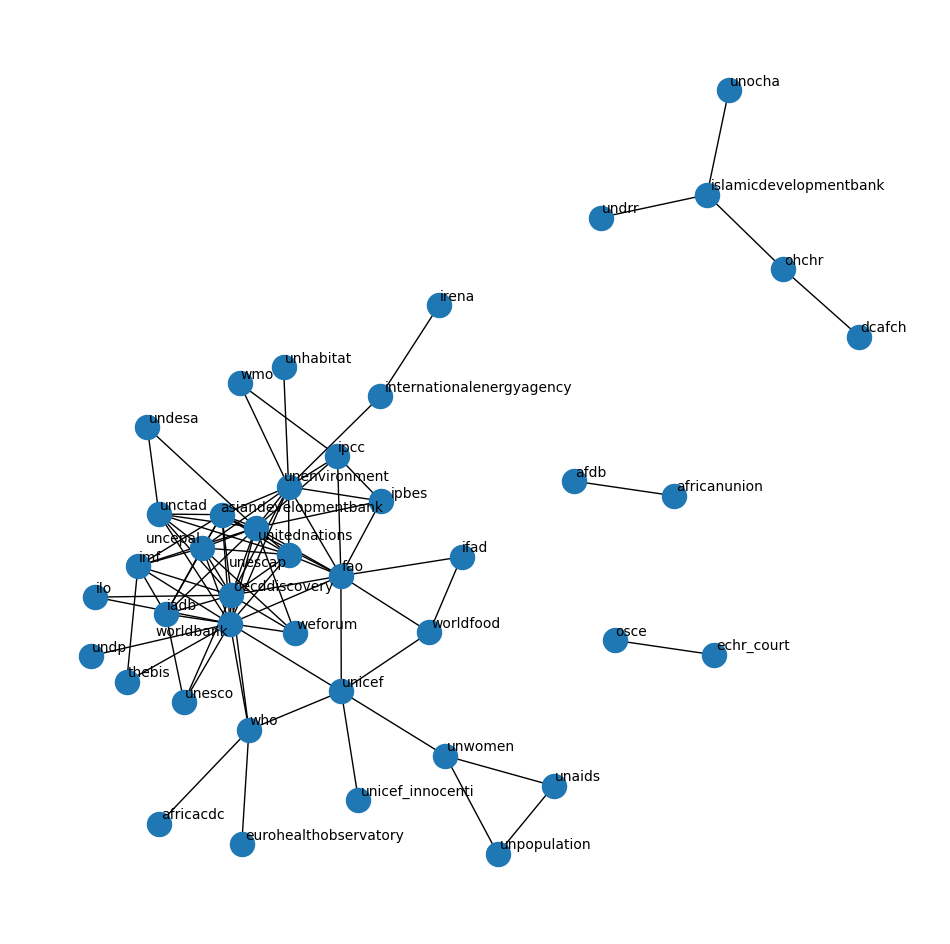

In [39]:
fig,ax = plt.subplots(figsize=(12,12))
from adjustText import adjust_text
from networkx.drawing.nx_agraph import graphviz_layout

# nx.draw(G,with_labels=True,ax=ax)

pos=graphviz_layout(G)
nx.draw(G
        ,pos = pos)
# labels = nx.draw_networkx_labels(G
#         ,pos = pos)
texts = [plt.text(v[0], v[1], k, ha='center', va='center') for k,v in pos.items()]
adjust_text(texts,lim=10)


In [293]:
degCen = nx.degree_centrality(G)
degCen = pd.DataFrame(degCen, index = ['degree_centrality']).T
degCen = degCen.sort_values(by = 'degree_centrality', ascending = False)

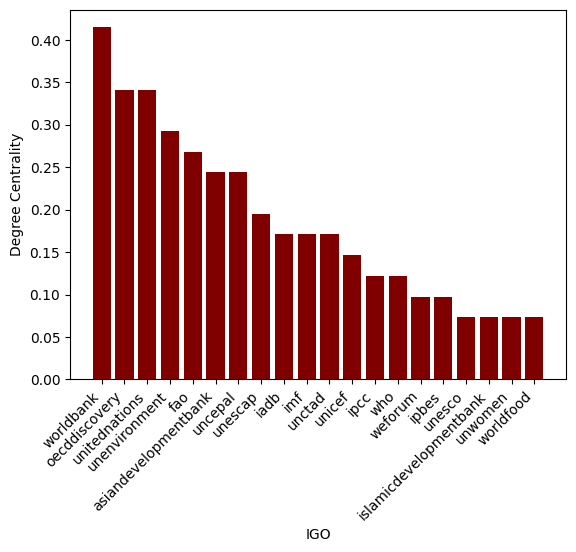

In [315]:
plt.bar(degCen.index[0:20], degCen.degree_centrality[0:20], color = 'maroon')
plt.xlabel('IGO')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Degree Centrality')
plt.savefig('igoDC.eps', bbox_inches='tight')

In [309]:
betCen = nx.betweenness_centrality(G)
betCen = pd.DataFrame(betCen, index = ['betweenness_centrality']).T
betCen = betCen.sort_values(by = 'betweenness_centrality', ascending = False)

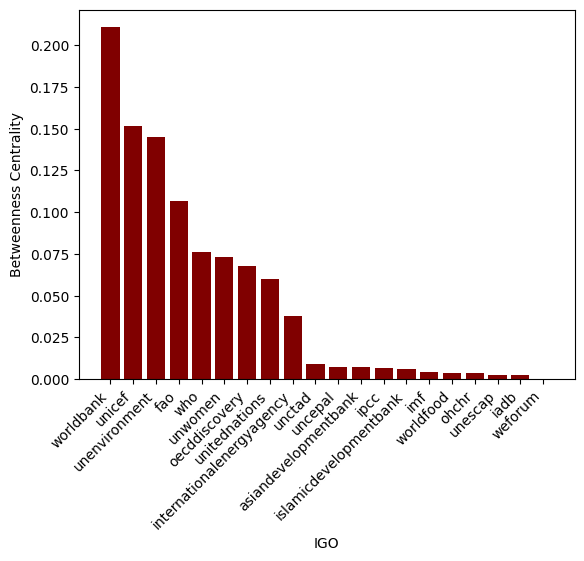

In [317]:
plt.bar(betCen.index[0:20], betCen.betweenness_centrality[0:20], color = 'maroon')
plt.xlabel('IGO')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Betweenness Centrality')
plt.savefig('igoBC.eps', bbox_inches='tight')

In [35]:
fig.savefig('igoNetwork.png')

## Author Network

In [54]:
1

1

In [40]:
doi = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/doi.pickle')
title = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/title.pickle')
authors = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/author.pickle')
countries = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/countries.pickle')
afs = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/afs.pickle')

In [ ]:
# ym = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/ym.pickle') 

In [ ]:
papers = pd.concat([doi, title, authors, countries, afs], axis=1)

In [ ]:
papers

In [ ]:
flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [ ]:
len(Ov)

In [ ]:
Ov.DOI.isin(papers)

In [ ]:
polCit = papers[papers.doi.isin(Ov.DOI)].reset_index()

In [ ]:
polCit

In [ ]:
polCit.to_csv('polCit.csv')

In [76]:
Ov = df

In [61]:
Ov.to_csv('Ov.csv')

In [ ]:
for st in Ov['DOI']:
    if not st[0:3] == '10.':
        print(st)

In [36]:
#SKIP once downloaded
#ScOvMerged = pd.merge(papers, Ov, left_on='doi', right_on='DOI')

In [ ]:
ScOvMerged = pd.read_csv("ScOvMerged.csv").drop(ScOvMerged.columns[0], axis=1)

In [ ]:
ScOvMerged

In [ ]:
ScOvMerged.groupby('DOI').sum()

In [46]:
import math

In [48]:
flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [118]:
authorsList = [i for i in flatten2(ScOvMerged['author']) if (i != '' and not math.isnan(float(i)))]
#list of all authors cited by policy
authorsCited = collections.Counter(authorsList)
citedAuthors500 = authorsCited.most_common(500) #max 845, min 90
#top 500 authors cited by policy

In [146]:
ScOvMerged['author']

0          [7201520879, 6603204543, 23390889200]
1          [7201520879, 6603204543, 23390889200]
2          [7201520879, 6603204543, 23390889200]
3          [7201520879, 6603204543, 23390889200]
4          [7201520879, 6603204543, 23390889200]
                          ...                   
35280    [25923195300, 25923195300, 25923195300]
35281    [25923195300, 25923195300, 25923195300]
35282    [25923195300, 25923195300, 25923195300]
35283    [25923195300, 25923195300, 25923195300]
35284    [25923195300, 25923195300, 25923195300]
Name: author, Length: 35285, dtype: object

In [148]:
authors500 = []
for c in range(500):
    authors500.append(citedAuthors500[c][0])

In [149]:
with open('authors500.txt','w') as f:
    f.writelines((authors500))

In [150]:
with open('authors500.txt', 'w') as f:
    for d in authors500:
        f.write("%s\n" % d)

In [151]:
# data = [1, 2, 3]
# with open('hoge.txt','w') as f:
#     f.writelines((data))

In [152]:
coAuthorsList = list(itertools.combinations([authors500], 2))

In [153]:
def listen2(x):
    if type(x) == float:
        return [x]
    return x

In [154]:
def numCo(i, j):
    n = 0
    for c in range(len(polCit)):
        if (i in listen2(polCit.iloc[c]['author'])) and (j in listen2(polCit.iloc[c]['author'])):
            n += 1

    return n

In [155]:
# coAuthors.to_csv()

In [156]:
v_sum = 0
for k, v in d.items():
    for kk, vv in v.items():
        v_sum += vv
print(v_sum)

AttributeError: 'str' object has no attribute 'items'

In [157]:
d = {}
for i in range(len(authors500)):
    sub_d = {}
    for j in range(len(authors500)):
        if i == j:
            continue
        sub_d[authors500[j]] = 0
    d[authors500[i]] = sub_d

In [158]:
for lis in polCit['author']:
    if type(lis) == float:
        continue
    for i in range(len(lis)):
        for j in range(i+1, len(lis)):
            if d.get(lis[i]) is not None and d.get(lis[i]).get(lis[j]) is not None:
                d[lis[i]][lis[j]] += 1
                d[lis[j]][lis[i]] += 1

In [159]:
network = []
for x in d:
    for y in d[x]:
        network.append([x, y, d[x][y]])

coAuthors = pd.DataFrame(network)
coAuthors['pair'] = coAuthors.apply(lambda r: tuple(set((r[0], r[1]))), axis=1)
coAuthors = coAuthors.drop_duplicates(['pair'])
coAuthors.columns = ['author0', 'author1', 'n', 'pair']

In [239]:
coAuthors

,author0,author1,n,pair
0,7003501910,6602435618,33,"(6602435618, 7003501910)"
1,7003501910,36151443700,21,"(36151443700, 7003501910)"
2,7003501910,36773909000,0,"(7003501910, 36773909000)"
3,7003501910,21744127000,27,"(21744127000, 7003501910)"
4,7003501910,8841196600,0,"(7003501910, 8841196600)"
...,...,...,...,...
249423,36893082400,13407965000,0,"(36893082400, 13407965000)"
249443,36893082400,7005939834,0,"(36893082400, 7005939834)"
249460,36893082400,7007050344,0,"(36893082400, 7007050344)"
249467,36893082400,7401874732,0,"(36893082400, 7401874732)"


In [161]:
GCoAuthors = nx.from_pandas_edgelist(coAuthors.query('n>=1'),source='author0',target='author1')

In [162]:
author_cited = collections.Counter(flatten2(ScOvMerged.author))


In [240]:
partition = pd.read_pickle('/disks/qnap2/shared/scopus_2022/paper_detail/partition.pickle')
DOI = pd.read_pickle('/disks/qnap2/shared/scopus_2021/paper_detail/doi.pickle')
doi_p = pd.concat([DOI,partition],axis=1).drop_duplicates('doi').set_index('doi')
doi_p = doi_p.partition.to_dict()

In [241]:
ScOvMerged = pd.read_pickle("/disks/qnap2/notebook/t-iwata/monooki/ScOvMerged.pkl")

In [242]:
ScOvMerged['partition'] = ScOvMerged['DOI'].map(doi_p)

In [243]:
author_cited = collections.Counter(flatten2(ScOvMerged.author))


In [244]:
author_partition_ = flatten2(ScOvMerged.drop_duplicates('doi').dropna(subset = 'author').apply(lambda x: [[y,x.partition] for y in x.author],axis=1))
author_partition = pd.DataFrame(author_partition_).groupby(0).agg(pd.Series.mode)
author_partition

,1
0,
,6.0
10042699900,0.0
10044575200,1.0
10140031300,2.0
10141803100,2.0
...,...
9844732800,2.0
9844777200,3.0
9844801400,2.0


In [245]:
author_partition[1].apply(lambda x: type(x) ).apply(str).sort_values()

0
               <class 'numpy.float64'>
57216344981    <class 'numpy.float64'>
57216346299    <class 'numpy.float64'>
57216346352    <class 'numpy.float64'>
57216348525    <class 'numpy.float64'>
                        ...           
57200575729    <class 'numpy.ndarray'>
16316261300    <class 'numpy.ndarray'>
57205902723    <class 'numpy.ndarray'>
8258491400     <class 'numpy.ndarray'>
57209181881    <class 'numpy.ndarray'>
Name: 1, Length: 14001, dtype: object

In [246]:
author_partition = author_partition[1].apply(lambda x:x[0] if type(x) == np.ndarray and len(x)>=1 else x)

In [247]:
author_name = pd.read_pickle('/disks/qnap2/shared/scopus_2021/id_names/author.pickle')

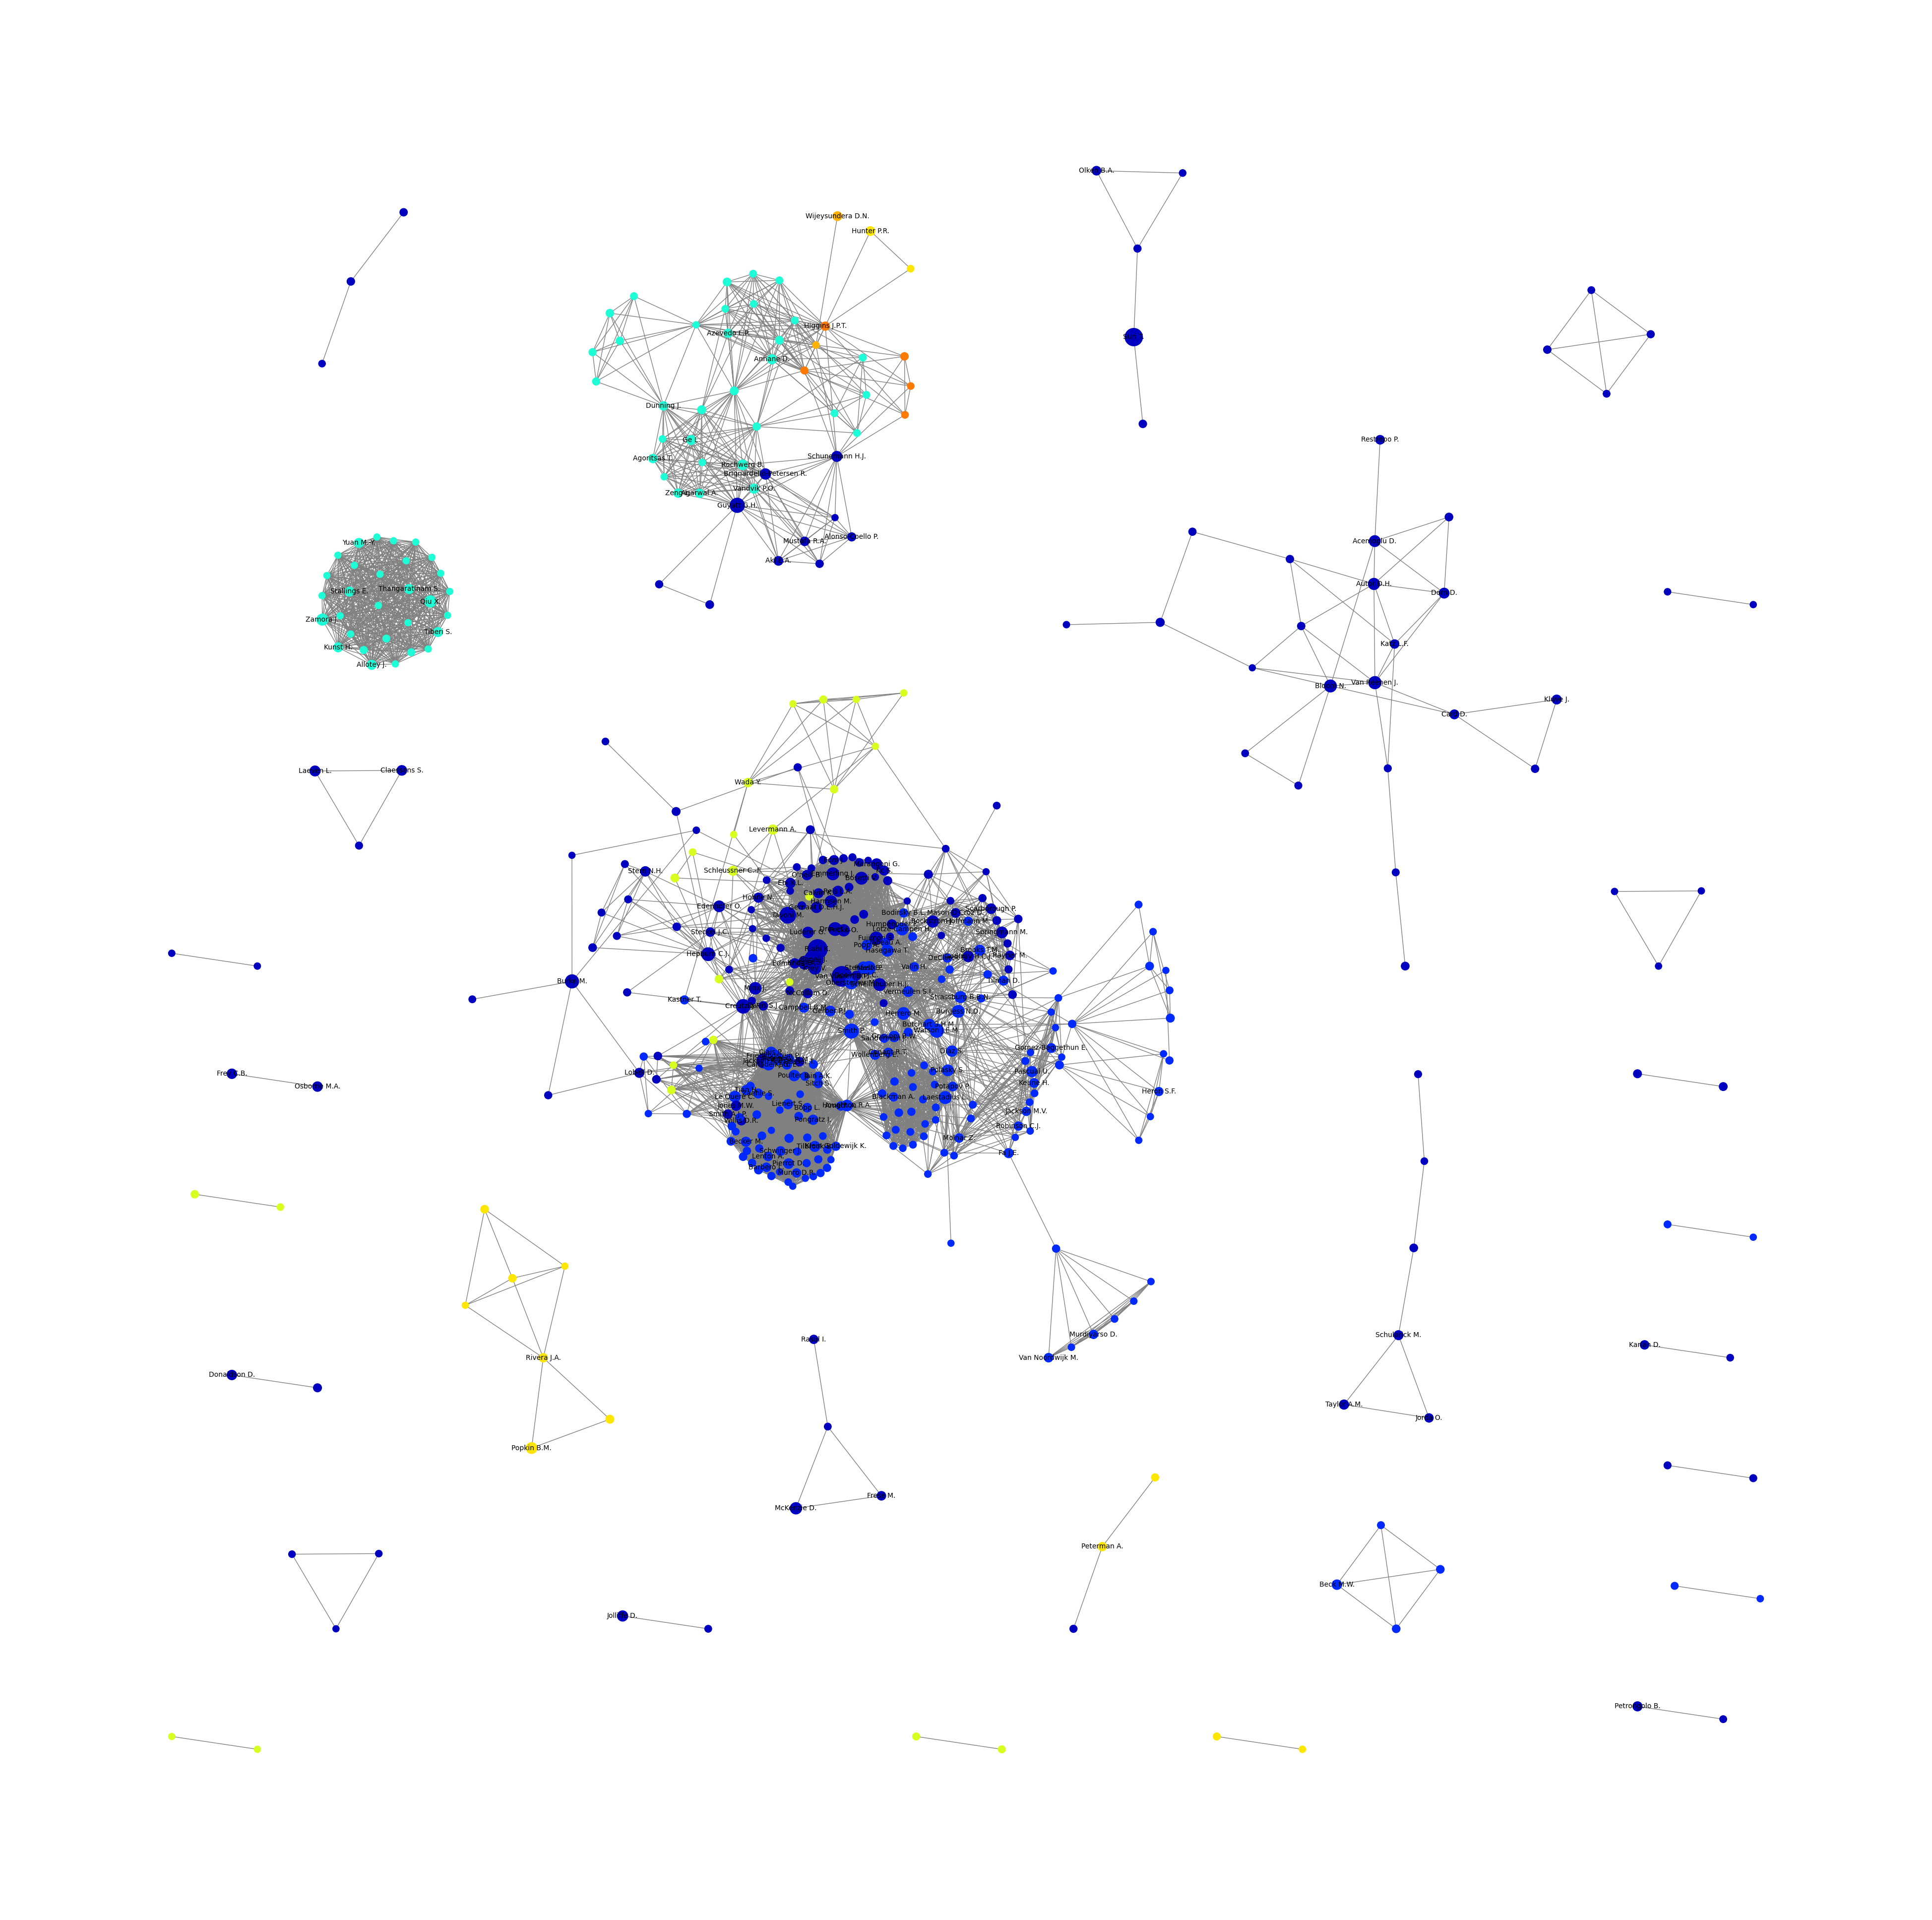

In [277]:
fig,ax = plt.subplots(figsize=(50,50))
from adjustText import adjust_text
from networkx.drawing.nx_agraph import graphviz_layout

# nx.draw(G,with_labels=True,ax=ax)

pos=graphviz_layout(GCoAuthors)
nx.draw(GCoAuthors,node_size=[author_cited[n] for n in GCoAuthors.nodes()],edge_color='gray'
        ,node_color = [author_partition.loc[n]+1 if n in author_partition.index  else 0 for n in GCoAuthors.nodes()  ]
        ,cmap='jet',vmin=author_partition.min(),vmax=author_partition.max()
        ,pos = pos)
# labels = nx.draw_networkx_labels(G
#         ,pos = pos)
texts = [plt.text(v[0], v[1], author_name.loc[k]['name'] if k in author_name.index else k, ha='center', va='center') \
         for k,v in pos.items() if author_cited[k]>150]
# adjust_text(texts,lim=10)
fig.savefig('coAuthNetwork.png')

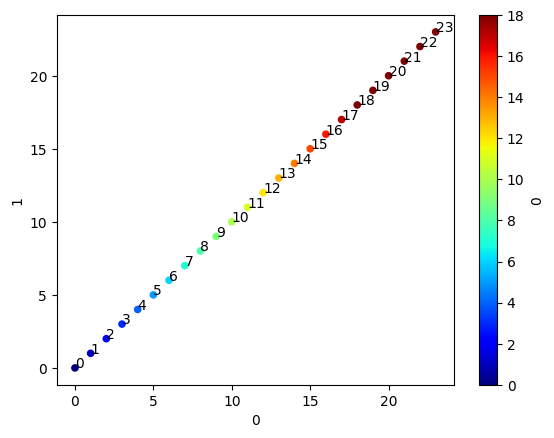

In [253]:
ax = pd.DataFrame([range(24),range(24)]).T.plot.scatter(x=0,y=1,c=0,    cmap='jet',vmin=author_partition.min(),vmax=author_partition.max())
for i in range(24):
    ax.text(i, i, i)

In [254]:
collections.Counter([author_partition.loc[n] if n in author_partition.index  else -1 for n in GCoAuthors_.nodes()  ])

Counter({11.0: 7})

[290, 51, 30, 22, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Counter({2.0: 171, 0.0: 101, 10.0: 18})


/tmp/ipykernel_1426929/1193461296.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]


Counter({6.0: 32, 0.0: 10, 13.0: 5, 12.0: 2, 11.0: 2})


/tmp/ipykernel_1426929/1193461296.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]


Counter({6.0: 30})


/tmp/ipykernel_1426929/1193461296.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]


Counter({0.0: 22})


/tmp/ipykernel_1426929/1193461296.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]


Counter({11.0: 7})


/tmp/ipykernel_1426929/1193461296.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]


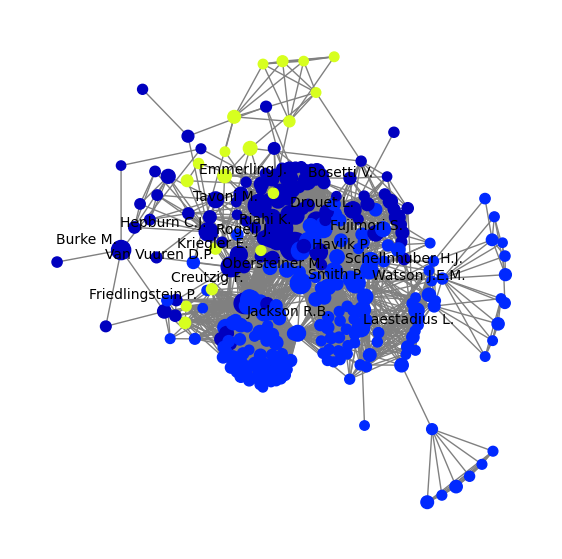

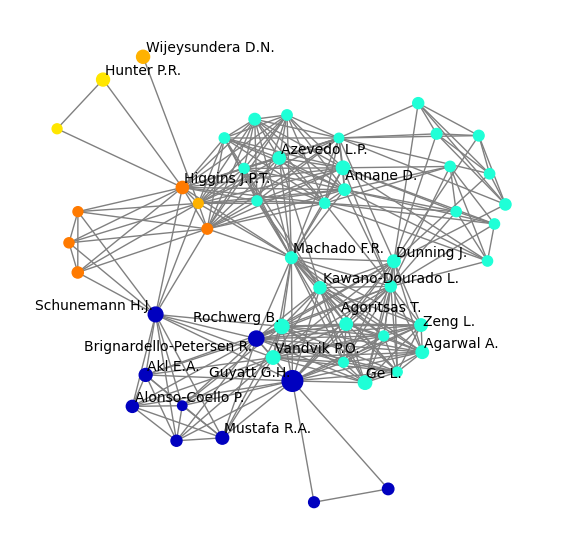

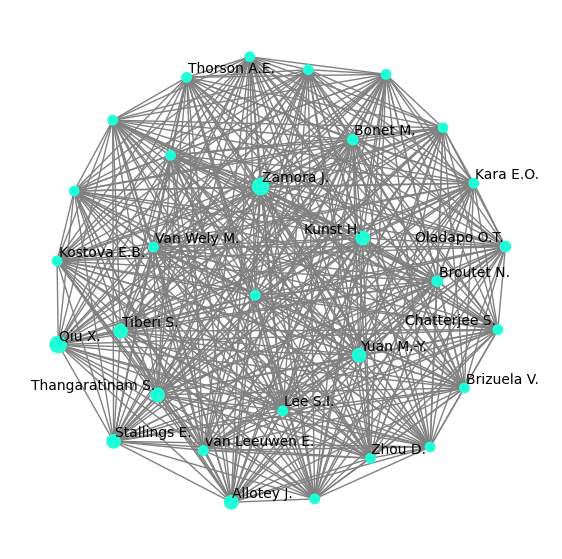

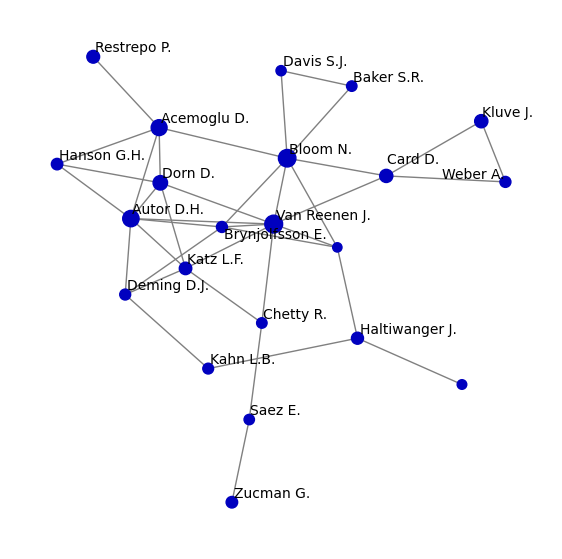

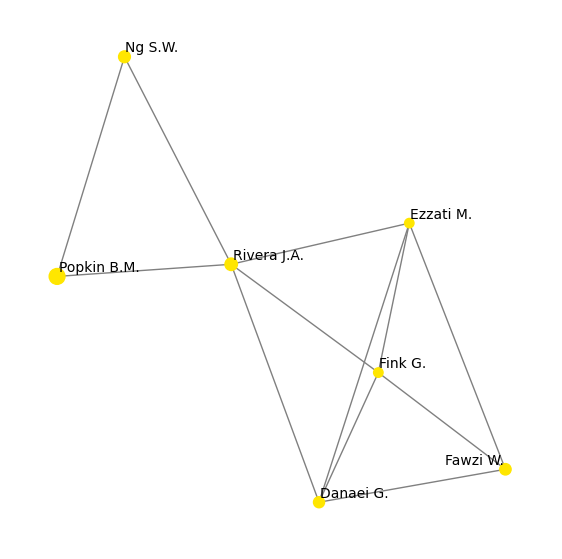

In [280]:
cs = sorted(nx.connected_components(GCoAuthors),key=len,reverse=True)
print([len(c) for c in cs])
for c in cs[:5]:
    fig,ax = plt.subplots(figsize=(7,7))

    # nx.draw(G,with_labels=True,ax=ax)
    GCoAuthors_ = nx.subgraph(GCoAuthors,c)
    pos=graphviz_layout(GCoAuthors_)
    nx.draw(GCoAuthors_,node_size=[author_cited[n]*0.5 for n in GCoAuthors_.nodes()],edge_color='gray'
            ,node_color = [author_partition.loc[n]+1 if n in author_partition.index  else 0 for n in GCoAuthors_.nodes()  ]
            ,cmap='jet',vmin=author_partition.min(),vmax=author_partition.max()
            ,pos = pos)
    # labels = nx.draw_networkx_labels(G
    #         ,pos = pos)
    print(collections.Counter([author_partition.loc[n] if n in author_partition.index  else -1 for n in GCoAuthors_.nodes()  ]))
    
    top_authors = pd.Series(author_cited).loc[c].sort_values()[-20:]
    texts = [plt.text(pos[a][0], pos[a][1], author_name.loc[a]['name'] if a in author_name.index else a, ha='center', va='center') \
             for a in top_authors.index ]
    adjust_text(texts,lim=10)  

In [275]:
pd.options.display.max_colwidth = 500
pd.read_pickle('/disks/qnap2/shared/scopus_2022/paper_detail/partition_info/tfidf_partition.pickle')

0
0.0     [Social, Study, Student, Paper, Research, Political, Result, Economic, Patient, Public, Different, Article, Important, Provide, Model, Use, Finding, New, Datum, Improve, Support, Identify, Role, Impact, Help, First, Individual, Relationship, Work, Develop, Practice, Examine, Effect, Many, Approach, Country, Local, Person, Change, Human, Particular, Purpose, Future, Development, Time, ABSTRACT, Financial, Cultural, Likely, Environmental, Right, Knowledge, Education, Understand, Method, High, ...
1.0     [Algorithm, Paper, System, Method, Model, Approach, IEEE, Different, Improve, Performance, Reduce, High, User, Problem, Provide, Achieve, Dynamic, Real, New, Datum, Result, Low, Due, Large, Efficient, Optimal, Solve, Use, Network, Obtain, Number, Multiple, Application, Design, Experimental, Novel, Current, Important, Single, Order, Effective, Experimental_result, Control, Technique, Able, First, Object, Image, Time, Mobile, Work, Simulation, Robust, Detect, Scheme, Many, Study,

In [271]:
pd.read_pickle('/disks/qnap2/shared/scopus_2022/paper_detail/partition_info/tfidf_partition_sub.pickle').iloc[20:]

0
10_0     [Pile, Rock_mas, Geogrid, Rock, Soil, Geotechnical, Rockburst, Embankment, Seismic, Geosynthetic, Shear, Stone_column, Result, Sand, Subgrade, Num...
10_1     [Magmatic, Eclogite, Crustal, Tectonic, Mantle, Magma, Granulite, Mafic, Zircon, Amphibolite, Subduction, Geochemical, Volcanic, Orogenic, Granito...
10_10    [Sediment, Dune, Coastal, Scour, Wave, Estuary, Breakwater, Tidal, River, Sediment_transport, Beach, Numerical, Scour_hole, Flow, Shoreline, Resul...
10_11    [Landslide, Volcanic, Debris_flow, Magma, Landslide_susceptibility, Pyroclastic, Lava, Volcano, Eruption, Geothermal, Eruptive, Magmatic, Seismic,...
10_12    [Urban, LST, UHI, Land_surface_temperature, Green_roof, Urban_heat_island, Thermal, Wind, Result, Atmospheric, Study, City, Building, Heat_wafe, M...
                                                                                 ...                                                                          
9_5      [MOF, Coordination_polymer, Title_c

In [ ]:
# in d, instead of adding to v, add to list of igos that cited

In [ ]:
Authors500Df = pd.DataFrame (authors500, columns = ['index', 'times cited'])
Authors500Df = Authors500Df.set_index('index')
Authors500Df = Authors500Df.sort_values(by='index')
Authors500Df

jaccards2 = [[i,j,cos_sim_from_list(set(ic),set(jc))] for (i,j),(ic,jc) in zip(itertools.combinations(cites["Cited by source ID"],2),
                         itertools.combinations(cites.DOI,2))]
jaccards2 = pd.DataFrame(jaccards2)
jaccards2.columns = ['s','t','weight']
jaccards2

## First citation

In [ ]:
Ov

In [52]:
groupPapers = df.groupby('DOI')['Cited by date'].min()
groupPapers

DOI
10.1001/jama.2015.18392      2017-04-19
10.1001/jama.2016.0275       2017-11-06
10.1001/jama.2016.0287       2018-07-23
10.1001/jama.2016.0288       2017-02-13
10.1001/jama.2016.11237      2017-01-10
                                ...    
10.7930/j0j964j6             2018-01-01
10.7930/j0r49nqx             2019-10-31
10.7930/nca4.2018            2019-12-06
10.7930/nca4.2018.ap2        2019-09-04
10.9785/9783504384807-008    2016-01-01
Name: Cited by date, Length: 5081, dtype: object

In [159]:
new = pd.DataFrame(df.groupby('DOI'), columns = ['DOI', 'Contents'])

In [169]:
new

,DOI,Contents
0,10.1001/jama.2015.18392,Title ...
1,10.1001/jama.2016.0275,...
2,10.1001/jama.2016.0287,...
3,10.1001/jama.2016.0288,Ti...
4,10.1001/jama.2016.11237,...
...,...,...
5076,10.7930/j0j964j6,...
5077,10.7930/j0r49nqx,...
5078,10.7930/nca4.2018,...
5079,10.7930/nca4.2018.ap2,...


In [3]:
Ov

NameError: name 'Ov' is not defined

In [172]:
new.iloc[1,1]

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),Type,Publisher,Authors
19382,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Втручання для забезпечення раціонального викор...,2022-11-17,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/364581,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19385,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Antimikrobiyal yönetimi uygulamaları: pratik b...,2022-07-08,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/359164,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19386,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Promoting appropriate use of antibiotics in ho...,2022-06-27,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/357630,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19389,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,oecddiscovery,OECD,Challenges to Tackling Antimicrobial Resistance,2020-04-01,igo,NaN,IGO,https://dx.doi.org/10.1017/9781108864121,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19390,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Interventions de gestion des antimicrobiens : ...,2022-06-13,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/356022,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19391,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Intervencije u području upravljanja upotrebom ...,2022-06-09,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/355701,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19392,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,EVIPNet evidence brief for policy: tackling an...,2022-02-07,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/351528,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19393,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,worldbank,World Bank,"Disease Control Priorities, Third Edition : Vo...",2017-11-06,igo,development bank,IGO,https://openknowledge.worldbank.org/handle/109...,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19394,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Вмешательства по рациональному использованию п...,2021-11-10,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/348354,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
19395,Effect of Behavioral Interventions on Inapprop...,10.1001/jama.2016.0275,JAMA,2016-02-09T00:00:00+00:00,28,https://doi.org/10.1001/jama.2016.0275,who,World Health Organization,Interwencje z zakresu zarządzania środkami prz...,2021-06-23,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/341953,https://www.overton.io/document.php?policy_doc...,NaN,

In [ ]:
new2[new2['Cited by source ID'] == 'thebis']

In [ ]:
li1 = []
for c in range (len(new)):
    li1.append(len(new[1][c].groupby('Cited by source ID')))
#list(dict.fromkeys(df['DOI']))
li1

In [74]:
len(li1)

5081

In [ ]:
firstIgos = []
for c in range(len(new)):
    tmp = new[1][c].sort_values('Cited by date')
    firstIgos.append(tmp.iloc[0]['Cited by source ID'])
firstIgos

In [56]:
len(firstIgos)

5081

In [163]:
df3, df4, df5 = pd.DataFrame(new.iloc[:,0], ), pd.DataFrame(firstIgos, columns = ['first igo']), pd.DataFrame(li1, columns = ['num igos'])

In [164]:
df3

,DOI
0,10.1001/jama.2015.18392
1,10.1001/jama.2016.0275
2,10.1001/jama.2016.0287
3,10.1001/jama.2016.0288
4,10.1001/jama.2016.11237
...,...
5076,10.7930/j0j964j6
5077,10.7930/j0r49nqx
5078,10.7930/nca4.2018
5079,10.7930/nca4.2018.ap2


In [165]:
new2 = pd.concat([df3, df4, df5], axis = 1)

In [166]:
new2

,DOI,first igo,num igos
0,10.1001/jama.2015.18392,who,1
1,10.1001/jama.2016.0275,worldbank,3
2,10.1001/jama.2016.0287,who,1
3,10.1001/jama.2016.0288,who,1
4,10.1001/jama.2016.11237,oecddiscovery,2
...,...,...,...
5076,10.7930/j0j964j6,unenvironment,7
5077,10.7930/j0r49nqx,who,4
5078,10.7930/nca4.2018,oecddiscovery,4
5079,10.7930/nca4.2018.ap2,imf,4


In [185]:
aa = new2[new2['num igos']>=2].groupby('first igo').count().sort_values('DOI', ascending = False)
aa.head(30)

,DOI,num igos
first igo,,
oecddiscovery,1140,1140
worldbank,796,796
imf,337,337
unenvironment,279,279
who,253,253
iadb,223,223
fao,149,149
thebis,128,128
africacdc,81,81


In [ ]:
for c in range(len(new2)):
    if new2[c][2] >= 2:
        

In [99]:
new2.rename(columns=str).columns

Index(['0', '0', '0'], dtype='object')

In [190]:
firstIgosFreq = pd.DataFrame(np.array(collections.Counter(firstIgos).most_common()), columns = ['igo ID', 'times'])
firstIgosFreq['times'].astype(int).sum()

5081

In [191]:
firstIgosFreq

,igo ID,times
0,oecddiscovery,1370
1,worldbank,893
2,who,458
3,imf,395
4,unenvironment,284
...,...,...
59,islamicdevelopmentbank,1
60,osce,1
61,opcwint,1
62,unscn,1


In [192]:
firstIgosABC = firstIgosFreq.sort_values(by = ['igo ID']).reset_index().drop(columns = ['index'])
firstIgosABC

,igo ID,times
0,afdb,3
1,africacdc,87
2,africanunion,11
3,arcticcouncil,2
4,asean,3
...,...,...
59,wipo,6
60,wmo,22
61,worldbank,893
62,worldfood,18


In [193]:
citesABC

,Cited by source ID,DOI,numCites
0,afdb,"[10.1086/682347, 10.1086/684014, 10.1093/restu...",302
1,africacdc,"[10.1001/jama.2016.4151, 10.1002/14651858.cd00...",145
2,africanunion,"[10.1016/j.jdeveco.2015.10.007, 10.1787/978926...",118
3,arcticcouncil,"[10.1007/978-3-658-13213-2_95, 10.1007/978-3-6...",60
4,asean,"[10.1016/s0140-6736(15)01024-7, 10.1787/g2g555...",271
...,...,...,...
71,wmo,"[10.17226/21852, 10.1038/nclimate2769, 10.1038...",722
72,worldbank,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",17700
73,worldbankifc,"[10.1596/978-1-4648-0671-1, 10.1596/978-1-4648...",133
74,worldfood,"[10.1016/s0140-6736(15)01024-7, 10.1016/s0140-...",337


In [194]:
citesFirst = citesABC[citesABC['Cited by source ID'].isin(firstIgos)].reset_index().drop(columns = ['index'])
citesFirst

,Cited by source ID,DOI,numCites
0,afdb,"[10.1086/682347, 10.1086/684014, 10.1093/restu...",302
1,africacdc,"[10.1001/jama.2016.4151, 10.1002/14651858.cd00...",145
2,africanunion,"[10.1016/j.jdeveco.2015.10.007, 10.1787/978926...",118
3,arcticcouncil,"[10.1007/978-3-658-13213-2_95, 10.1007/978-3-6...",60
4,asean,"[10.1016/s0140-6736(15)01024-7, 10.1787/g2g555...",271
...,...,...,...
59,wipo,"[10.18411/d-2016-154, 10.2499/9780896295841, 1...",135
60,wmo,"[10.17226/21852, 10.1038/nclimate2769, 10.1038...",722
61,worldbank,"[10.1093/restud/rdv039, 10.1093/restud/rdv039,...",17700
62,worldfood,"[10.1016/s0140-6736(15)01024-7, 10.1016/s0140-...",337


In [195]:
li = [[firstIgosABC.iloc[c]['igo ID'], int(firstIgosABC.iloc[c]['times'])/citesFirst.iloc[c]['numCites'], int(firstIgosABC.iloc[c]['times']), citesFirst.iloc[c]['numCites']] for c in range(len(firstIgosABC))]

firstIgosNorm = pd.DataFrame(li, columns = ['igo ID', 'cites first/all', 'times first', 'times all'])

In [196]:
firstIgosNorm.sum()

igo ID             afdbafricacdcafricanunionarcticcouncilaseanasi...
cites first/all                                             5.884808
times first                                                     5081
times all                                                     110800
dtype: object

In [197]:
pd.set_option('display.max_rows', None)

In [198]:
Desc = firstIgosNorm.sort_values('cites first/all', ascending = False).reset_index().drop(columns = 'index')
Desc
# times each paper cited by other igos (impact)

,igo ID,cites first/all,times first,times all
0,africacdc,0.600000,87,145
1,opcwint,0.333333,1,3
2,interpol,0.240000,6,25
3,stratcomcoe,0.232143,13,56
4,wto,0.191176,13,68
5,councilofeurope,0.183908,16,87
6,redcross,0.181818,2,11
7,unuiigh,0.166667,6,36
8,iom,0.147287,19,129
9,nordiccouncil,0.140468,42,299


In [291]:
Desc.loc[Desc['igo ID']=='oecddiscovery']

,igo ID,cites first/all
54,oecddiscovery,0.030484


In [258]:
uniqueFirstIgos = list(dict.fromkeys(firstIgos))
len(uniqueFirstIgos)

64

In [295]:
df.loc[df['Cited by source']=='OECD']

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),Type,Publisher,Authors
18,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Improving skills and employment opportunities ...,2022-10-10,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/51e...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
20,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Enhancing Innovation in Rural Regions of Switz...,2022-09-28,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/307...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
23,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Unlocking Rural Innovation,2022-09-28,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/904...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
32,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Mastering the transition: A synthetic literatu...,2022-06-23,igo,NaN,IGO,https://dx.doi.org/10.1787/5fad3487-en,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
42,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Returns to intangible capital in global value ...,2020-09-30,igo,NaN,IGO,https://dx.doi.org/10.1787/4cd06f19-en,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575278,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,OECD Employment Outlook 2022,2022-09-09,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/1bb...,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575279,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,SME Policy Index: Western Balkans and Turkey 2022,2022-07-08,igo,NaN,IGO,https://dx.doi.org/10.1787/b47d15f0-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575280,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Making the most of public investment to addres...,2022-06-22,igo,NaN,IGO,https://dx.doi.org/10.1787/8a1fb523-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575281,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Optimiser l'investissement public pour faire f...,2022-06-24,igo,NaN,IGO,https://dx.doi.org/10.1787/1ba1278d-fr,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN


In [296]:
df.loc[df['Cited by source ID']=='oecddiscovery']

,Title,DOI,Journal,Published on,Policy citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),Type,Publisher,Authors
18,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Improving skills and employment opportunities ...,2022-10-10,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/51e...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
20,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Enhancing Innovation in Rural Regions of Switz...,2022-09-28,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/307...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
23,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Unlocking Rural Innovation,2022-09-28,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/904...,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
32,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Mastering the transition: A synthetic literatu...,2022-06-23,igo,NaN,IGO,https://dx.doi.org/10.1787/5fad3487-en,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
42,Trade Induced Technical Change? The Impact of ...,10.1093/restud/rdv039,The Review of Economic Studies,2016-01-01T00:00:00+00:00,262,https://doi.org/10.1093/restud/rdv039,oecddiscovery,OECD,Returns to intangible capital in global value ...,2020-09-30,igo,NaN,IGO,https://dx.doi.org/10.1787/4cd06f19-en,https://www.overton.io/document.php?policy_doc...,gtr __OVSEP__ ESRC; other __OVSEP__ ESRC Janua...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575278,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,OECD Employment Outlook 2022,2022-09-09,igo,NaN,IGO,https://dx.doi.org/https://doi.org/10.1787/1bb...,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575279,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,SME Policy Index: Western Balkans and Turkey 2022,2022-07-08,igo,NaN,IGO,https://dx.doi.org/10.1787/b47d15f0-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575280,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Making the most of public investment to addres...,2022-06-22,igo,NaN,IGO,https://dx.doi.org/10.1787/8a1fb523-en,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN
575281,"OECD Economic Outlook, Volume 2022 Issue 1",10.1787/62d0ca31-en,"OECD Economic Outlook, Volume 2019 Issue 1",2022-06-08T00:00:00+00:00,26,https://doi.org/10.1787/62d0ca31-en,oecddiscovery,OECD,Optimiser l'investissement public pour faire f...,2022-06-24,igo,NaN,IGO,https://dx.doi.org/10.1787/1ba1278d-fr,https://www.overton.io/document.php?policy_doc...,NaN,NaN,NaN,NaN


In [352]:
igoID = Ov[['Cited by source ID', 'Cited by source']]

In [353]:
igoID = igoID.drop_duplicates().reset_index()
igoID = igoID.drop(igoID.columns[0], axis = 1)

In [354]:
igoID

,Cited by source ID,Cited by source
0,unitednations,United Nations
1,nordiccouncil,Nordic Council
2,unctad,UNCTAD
3,worldbank,World Bank
4,oecddiscovery,OECD
...,...,...
71,unfccc,United Nations Framework Convention on Climate Change
72,ittoigo,International Tropical Timber Organization
73,ohchr,United Nations Human Rights
74,unocha,United Nations Office for the Coordination of Humanitarian Affairs


In [359]:
print(igoID.to_latex(index = False, longtable = True, caption = 'IGO ID・機関名　対応表'))

\begin{longtable}{ll}
\caption{IGO ID・機関名　対応表}\\
\toprule
         Cited by source ID &                                                    Cited by source \\
\midrule
\endfirsthead
\caption[]{IGO ID・機関名　対応表} \\
\toprule
         Cited by source ID &                                                    Cited by source \\
\midrule
\endhead
\midrule
\multicolumn{2}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
              unitednations &                                                     United Nations \\
              nordiccouncil &                                                     Nordic Council \\
                     unctad &                                                             UNCTAD \\
                  worldbank &                                                         World Bank \\
              oecddiscovery &                                                               OECD \\
                       iadb &                                

/tmp/ipykernel_1426929/1533274832.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(igoID.to_latex(index = False, longtable = True, caption = 'IGO ID・機関名　対応表'))
